In [2]:
import numpy as np
from numpy import sin, pi, exp
import matplotlib.pyplot as plt
import xarray as xr
import gsw

In [3]:
# load realitstic topography
ds=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')


# General domain size

In [4]:
# horizontal grid cells
nx = 60
ny = 40

# choose vertical resolution
dr=np.array(40*np.ones(100))
nr = len(dr)
rF = (np.insert(np.cumsum(dr),0,0)) # z-coordinates of vertical cell faces
z = np.diff(rF)/2 + rF[:-1]         # z-coordinates of vertical cell centers
H = -np.sum(dr)  
print(H)

-4000.0


(40, 60)


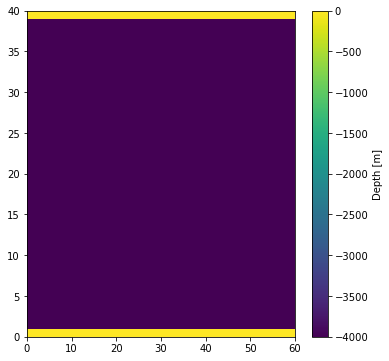

In [10]:

# bathymetry -- flat bottom of depth H (m) 
bump_max = 2000.  
bathy = H * np.ones([ny, nx])
bathy[0,:] = 0.                     # wall at southern boundary
bathy[ny-1,:] = 0. 
bathy.astype('>f4').tofile(f'flat_{len(dr)}_{dx}km.bin')
print(bathy.shape)
plt.figure(figsize=(6,6))
cb=plt.pcolormesh(bathy)
plt.colorbar(cb, label='Depth [m]')


# dx=25km


(40, 60)


<ipython-input-5-ba1236d7ab0c>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb=plt.pcolormesh(X,Y,bathy)


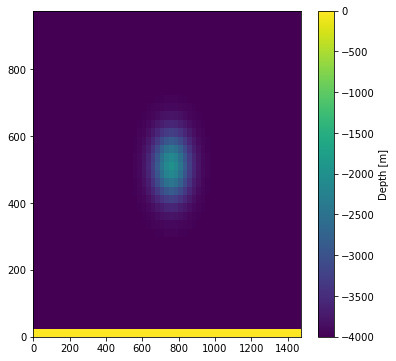

In [5]:

# bathymetry -- flat bottom of depth H (m) with idealized mid-depth ridge
bump_max = 2000.   # peak height of ridge above flat bottom depth
bathy = H * np.ones([ny, nx])
bump = np.zeros([ny, nx])
# gaussian bump in the center of domain
# horizontal resoluiton in km 25
dx=25
dy=25
X=np.arange(0,nx*dx,dx)
Y=np.arange(0,ny*dx,dy)
[x,y] = np.meshgrid(X,Y)
# create a topography with a bump in the center to trigger a Taylor Column
X0=30*dx
Y0=20*dx;
width=4*dx;
bump=(H+bump_max*np.exp(-((x-X0)**2+(y-Y0)**2)/width**2))


bathy =  bump;  
bathy[0,:] = 0.                     # wall at southern boundary
bathy[ny-1,:] = 0. 
bathy.astype('>f4').tofile(f'bump_{len(dr)}_{dx}km.bin')
print(bathy.shape)
plt.figure(figsize=(6,6))
cb=plt.pcolormesh(X,Y,bathy)
plt.colorbar(cb, label='Depth [m]')


[26477.23037165]
[26600.86151021]


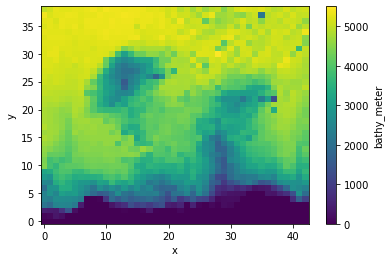

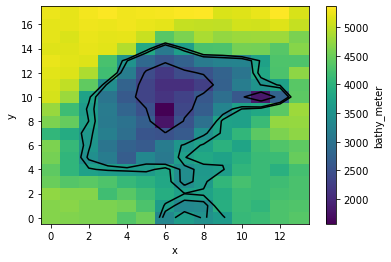

In [17]:
# downsampling on approx 25km resolution
dsw=7
print(gsw.distance([ds.nav_lon[0,0],ds.nav_lon[0,dsw]],[ds.nav_lat[150,150],ds.nav_lat[150,150]]))
print(gsw.distance([ds.nav_lon[0,0],ds.nav_lon[0,0]],[ds.nav_lat[150,150],ds.nav_lat[150+dsw,150]]))
test_bat=ds.bathy_meter.isel(x=slice(0,None,dsw),y=slice(0,None,dsw))
test_bat.plot.pcolormesh()
 # reduce on the MR region
plt.figure()
test_bat.isel(x=slice(7,21),y=slice(16,34)).plot.pcolormesh()
test_bat.isel(x=slice(7,21),y=slice(16,34)).plot.contour(levels=[2500,3500,3700],colors='k')

<ipython-input-21-97fcb46cb7d8>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,real_bat)


(40, 60)

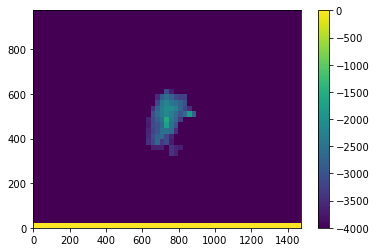

In [21]:
# mask everything deeper 3700 m 
tt=xr.where(test_bat<3700, test_bat,4000)
# assign MR to the model domain
real_bat=np.zeros((ny,nx))-4000
real_bat[12:28,23:37]=-1*tt.isel(x=slice(7,21),y=slice(18,34))
real_bat[0,:] = 0.                     # wall at southern boundary
real_bat[ny-1,:] = 0. 

plt.pcolormesh(X,Y,real_bat)
plt.colorbar()
real_bat.astype('>f4').tofile(f'maudrise_{len(dr)}_{dx}km.bin')
real_bat.shape

<ipython-input-36-762e39cc9dc1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb=axes[0].pcolormesh(X,Y,real_bat)
<ipython-input-36-762e39cc9dc1>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cb=axes[1].pcolormesh(X,Y,bathy)


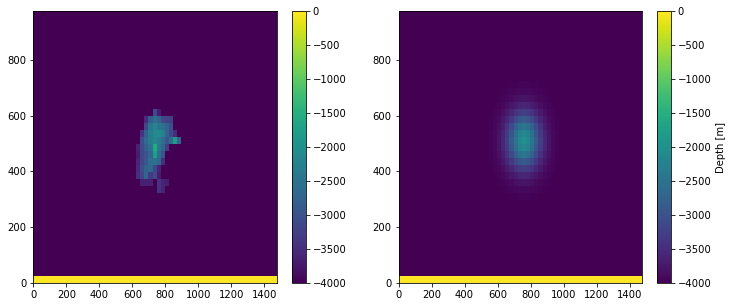

In [36]:
# compare bump and maud rise
fig,axes=plt.subplots(1,2,figsize=(12,5))
cb=axes[0].pcolormesh(X,Y,real_bat)
plt.colorbar(cb,ax=axes[0])
cb=axes[1].pcolormesh(X,Y,bathy)
plt.colorbar(cb,ax=axes[1], label='Depth [m]')
